In [20]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [72]:
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def print_function(f, x_min, x_max, n_points):
    x = x_min
    dx = (x_max - x_min) / n_points
    while x < x_max:
        print(x, f(x))
        x += dx

def plot_function(x_values, y_values, title = "An unnamed plot", x_label = "X Values", y_label = "Y Values", subtitle = "An unnamed subtitle", save_fig = False):
    plt.figure(figsize = (6,5))
    plt.plot(x_values, y_values)
    plt.title(title, fontsize = 14)
    plt.suptitle(subtitle, fontsize = 12)
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    if save_fig:
        filename = title.replace(" ", "_") + ".png"
        plt.savefig(filename)
    plt.show()

----
#### Exponential functions definition
> def normalize(x, x_min, x_max):
>> return (x - x_min) / (x_max - x_min)

> a: amplitude (y-intercept)  
> b: growth rate  
> x: time  
> def exponential_function(a, b, min = 0, max = 100, points = 100, y_range_min = 0, y_range_max = 100):
>> x_values = np.linspace(min, max, points) 
>> y_values = a * np.exp(b * x_values)  
>> y_values = normalize(y_values, np.min(y_values), np.max(y_values))  
>> return x_values, y_values  

In [68]:
def normalize(x, x_min, x_max):
    return (x - x_min) / (x_max - x_min)

# a: amplitude (y-intercept)
# b: growth rate
# x: time
def exponential_function(a, b, min = 0, max = 100, points = 100, y_range_min = 0, y_range_max = 100):
    x_values = np.linspace(min, max, points)
    y_values = a * np.exp(b * x_values)
    y_values = normalize(y_values, np.min(y_values), np.max(y_values))
    
    return x_values, y_values

### My probabilities :)

#### Main functions:

#### Probabilities: Eating, Sleeping, Peeing

----
#### Eating
P(E): Probability of Eating (defined by hunger level)
- a: 1
- b: 0.05
- min: 0
- max: 100

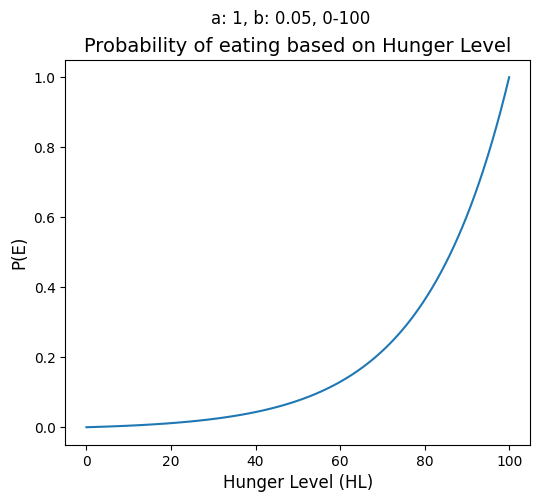

In [73]:
x_values, y_values = exponential_function(a = 1, b = 0.05, min = 0, max = 100)
plot_function(x_values=x_values, y_values=y_values, title = "Probability of eating based on Hunger Level", y_label = "P(E)", x_label = "Hunger Level (HL)", subtitle="a: 1, b: 0.05, 0-100")

----
#### Sleeping
P(S): Probability of Sleeping (defined by tiredness level)
- a: 1
- b: 0.4
- min: 0
- max: 100

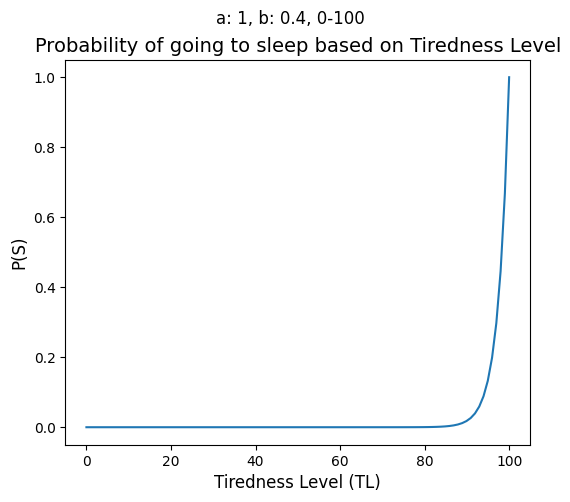

In [74]:
x_values, y_values = exponential_function(a = 1, b = 0.4, min = 0, max = 100)
plot_function(x_values=x_values, y_values=y_values, title = "Probability of going to sleep based on Tiredness Level", y_label = "P(S)", x_label = "Tiredness Level (TL)", subtitle = "a: 1, b: 0.4, 0-100", save_fig=True)

----
#### Peeing
P(S): Probability of Sleeping (defined by tiredness level)
- a: 1
- b: 0.1
- min: 0
- max: 100

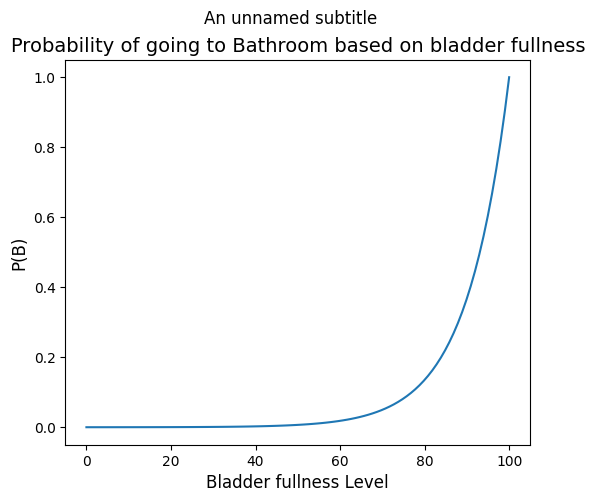

In [75]:
x_values, y_values = exponential_function(a = 1, b = 0.1, min = 0, max = 100)
plot_function(x_values=x_values, y_values=y_values, title = "Probability of going to Bathroom based on bladder fullness", y_label = "P(B)", x_label = "Bladder fullness Level", save_fig=True)

### After defining my variables
#### Questions to answer:
- How do the state variables change as time progresses?
- How do actions impact the state variables?

In [121]:
from enum import Enum

class Needs(Enum):
    BL = 'BladderLevel'
    TL = 'TirednessLevel'
    HL = 'HungerLevel'

class State:
    def __init__(self, need : Needs, min_value : float = 0, max_value : float = 100, starting_value : float = 0):
        self.need = need
        self.min_value = min_value
        self.max_value = max_value
        self.current_value = starting_value

    def update(self, value):
        self.current_value = value

    def increase(self, value):
        self.current_value += value
        if self.current_value > self.max_value:
            self.current_value = self.max_value

        self.current_value = round(self.current_value, 3)
        
    def decrease(self, value):
        self.current_value -= value
        if self.current_value < self.min_value:
            self.current_value = self.min_value

    def __str__(self):
        return f"{self.need.value}: {self.current_value}"

class Agent:
    def __init__(self, name : str):
        # hunger_level : State, tiredness_level : State, bladder_level : State
        self.name = name
        self.hunger = State(Needs.HL, 0, 100)
        self.tiredness = State(Needs.TL, 0, 100)
        self.bladder = State(Needs.BL, 0, 100)
        self.time = 0

    def go_bathroom(self, value : int = 10):
        # TODO: Value should be calculated based on the activity (how much time they spent on the bathroom)
        self.bladder.decrease(value) # Decreases the need of going to bathroom
        print(f"Going to the bathroom...Decreasing hunger by {value}")

    def eat(self, value : int = 10):
        # TODO: Value should be calculated based on the activity (what they ate)
        self.hunger.decrease(value)
        print(f"Eating...Decreasing hunger by {value}")

    def sleep(self, value : int = 10):
        # TODO: Value should be calculated based on the activity (how much time they slept)
        self.tiredness.decrease(value)
        print(f"Sleeping...Decreasing tiredness by {value}")

    def tick_10_min(self, times):
        hunger_increase = round(1/0.24, 3)
        tiredness_increase = round(1/0.96, 3)
        bladder_increase = round(1/0.18, 3)
        print(f"10 minutes will for {self.name}. Will increase {hunger_increase} hunger, {tiredness_increase} tiredness, {bladder_increase} bladder, {times} times.")

        for _ in range(times):
            # Simulates the passage of time, specifically 10 minutes for now
            # TODO: This should be based on the real time, and on how each need is affected by the time
            
            # want to eat every 4 hours (240 min) then hunger increases by 1/0.24 every 10 min tick
            self.hunger.increase(hunger_increase)

            # want to sleep every 16 hours (960 min) then tiredness increases by 1/0.96 every 10 min tick
            self.tiredness.increase(tiredness_increase)

            # want to go to the bathroom every 2 hours, then bladder increases by 1/0.18 every 10 min tick
            self.bladder.increase(bladder_increase)

            self.time += 10

    def __str__(self):
        return f"{self.name} - Hunger: {self.hunger.current_value}, Tiredness: {self.tiredness.current_value}, Bladder: {self.bladder.current_value}"
    
    def choose_activity(self):
        # The agent should choose the activity based on the needs, using bayes and the exponential functions of the needs

        # For now, it will choose randomly
        return np.random.choice([self.go_bathroom, self.eat, self.sleep])
    
    def act(self):
        print(f"Performing activity...Values before the activity: {self.hunger}, {self.tiredness}, {self.bladder}")
        activity = self.choose_activity()
        activity()


In [126]:
annie = Agent("Annie")
print(annie)

annie.tick_10_min(1)
print(annie)

annie.act()
print(annie)


Annie - Hunger: 0, Tiredness: 0, Bladder: 0
10 minutes will for Annie. Will increase 4.167 hunger, 1.042 tiredness, 5.556 bladder, 1 times.
Annie - Hunger: 4.167, Tiredness: 1.042, Bladder: 5.556
Performing activity...Values before the activity: HungerLevel: 4.167, TirednessLevel: 1.042, BladderLevel: 5.556
Sleeping...Decreasing tiredness by 10
Annie - Hunger: 4.167, Tiredness: 0, Bladder: 5.556
